# Story of the 'Flight Price Prediction'

## Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here we will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities, using which we aim to build a model which predicts the prices of the flights using various input features.

## About the Dataset

Link for the dataset — https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects
    
We have 2 datasets here — __training__ set and __test__ set.
    Size of training set: 10683 records
    Size of test set: 2671 records

Dataset features:
    
__Airline__: The name of the airline.

__Date_of_Journey__: The date of the journey

__Source__: The source from which the service begins.

__Destination__: The destination where the service ends.

__Route__: The route taken by the flight to reach the destination.

__Dep_Time__: The time when the journey starts from the source.

__Arrival_Time__: Time of arrival at the destination.

__Duration__: Total duration of the flight.

__Total_Stops__: Total stops between the source and destination.

__Additional_Info__: Additional information about the flight

__Price__: The price of the ticket

## Exploratory Data Analysis

In [129]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [73]:
#Load and display the training dataset using Pandas library
df = pd.read_excel(r"C:\Users\smith\OneDrive\Documents\Datascience\Evaluation-Projects\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


We identify the following points in the first look –
1. The Route column contains a list of cities which need to separate
2. The Arrival_Time column has dates attached along with, which need to separate. These are the cases when the flight takes off from the source on a date and reaches its destination on the next day
3. The Total_Stops also has text ‘stops’ added along with the number of stops, and certain columns as ‘non-stop’
4. Looks like all other features except Price are of type 'object', which need to convert to integer types

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


data.info() command gives the information about number of values present in each column, and data types of each column.
It is confirmed that we have all the columns as ‘object’ data types, and only ‘Price’ column is of integer type and also looks like there are null values, let us check that below

In [75]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is 1 missing value in Route column, and 1 missing value in Total_Stops column

Now we shall explore the columns available in our dataset, let us create list of categorical features and the unique values present.

In [76]:
#Creating list of categorical features
categorical = ['Airline','Source','Destination','Additional_Info']
for i in categorical:
    print(i, df[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


We observe that :

1. Airline column has 12 unique values - 'IndiGo' , 'Air India', 'Jet Airways' , 'SpiceJet' , 'Multiple carriers' , 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy' , 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet'.
2. Source column has 5 unique values – ‘Bangalore’, ‘Kolkata’, ‘Chennai’, ‘Delhi’ and ‘Mumbai’.
3. Destination column has 6 unique values - 'New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi' , 'Hyderabad'.
4. Additional info column has 10 unique values - 'No info', 'In-flight meal not included', 'No check-in baggage included', '1 Short layover' , 'No Info', '1 Long layover', 'Change airports' , 'Business class', 'Red-eye flight' , '2 Long layover'.

We split the Route feature into multiple cities, let us check the Route unique values first to identify maximum number of cities

In [77]:
print(df['Route'].unique())

['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU → BOM → GOI → 

It seems difficult to identify from the list above so we shall check the Total_Stops feature unique values to confirm the maximum number of cities

In [78]:
print(df['Total_Stops'].unique())

['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


Since there are maximum 4 stops, there can be maximum 6 cities.We shall continue splitting Route feature into 6 cities

In [79]:
df.Route = df.Route.str.split('→')
df['City1'] = df.Route.str[0]
df['City2'] = df.Route.str[1]
df['City3'] = df.Route.str[2]
df['City4'] = df.Route.str[3]
df['City5'] = df.Route.str[4]
df['City6'] = df.Route.str[5]

Now we split the Date_of_Journey into Date, Month and Year

In [80]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df['Journey_Month'] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df['Journey_Year'] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In the similar manner, we split the Dep_time feature, and create separate features for departure hours and minutes and split the Arrival_Time feature and create separate features for arrival hours and minutes

In [81]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

Now let us create a function to split Duration feature and create separate features for duration hours and minutes

In [82]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins

In [83]:
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])

Replace non-stop value of Total_Stops feature with 0 and extract integer part from other values

In [84]:
df.Total_Stops.replace('non-stop',0,inplace=True)
df.Total_Stops = df.Total_Stops.str.split(' ')
df.Total_Stops = df.Total_Stops.str[0]

And in the feature Additional_Info we observe that there are 2 similar values __No info__ and __No Info__, which can be 1 value 

In [85]:
df.Additional_Info.replace('No Info','No info', inplace=True)

Adding columns task is completed now, we need to drop the features from which we derived new features and which we feel no longer required

In [86]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Route','Duration'], axis=1, inplace=True)

Now check the null values after additional features

In [87]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops         3492
Additional_Info        0
Price                  0
City1                  1
City2                  1
City3               3492
City4               9117
City5              10637
City6              10682
Journey_Day            0
Journey_Month          0
Journey_Year           0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_min            0
Duration_hours         0
Duration_mins          0
dtype: int64

we observed that City4, City5 and City6 features has most of null values so we can drop them

In [88]:
df.drop(['City4','City5','City6'],axis=1,inplace=True)

Display the dataframe and see how it looks now

In [89]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,NaN,No info,3897,BLR,DEL,NaN,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,CCU,IXR,BBI,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL,LKO,BOM,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU,NAG,BLR,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR,NAG,DEL,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,NaN,No info,4107,CCU,BLR,NaN,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,NaN,No info,4145,CCU,BLR,NaN,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,NaN,No info,7229,BLR,DEL,NaN,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,NaN,No info,12648,BLR,DEL,NaN,1,3,2019,11,30,14,10,2,40


Recheck the null in all the features

In [90]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops        3492
Additional_Info       0
Price                 0
City1                 1
City2                 1
City3              3492
Journey_Day           0
Journey_Month         0
Journey_Year          0
Dep_hour              0
Dep_min               0
Arrival_hour          0
Arrival_min           0
Duration_hours        0
Duration_mins         0
dtype: int64

The NaN values of Total_Stops should be replaced with 0 as there are no in between stops and it is direct flight.<br>
The NaN values of City3 should be replaced with None as there are only 2 cities source and destination.<br>
There is 1 null value in City1 and 1 in City2, We shall check the particular row to fill it if possible.

In [91]:
df.Total_Stops.fillna('0',inplace=True)
df.City3.fillna('None',inplace=True)

Print the row where City1 and City2 have null values

In [92]:
print(df[df["City1"].isnull()])
print(df[df["City2"].isnull()])

        Airline Source Destination Total_Stops Additional_Info  Price City1  \
9039  Air India  Delhi      Cochin           0         No info   7480   NaN   

     City2 City3  Journey_Day  Journey_Month  Journey_Year  Dep_hour  Dep_min  \
9039   NaN  None            6              5          2019         9       45   

      Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
9039             9           25              23             40  
        Airline Source Destination Total_Stops Additional_Info  Price City1  \
9039  Air India  Delhi      Cochin           0         No info   7480   NaN   

     City2 City3  Journey_Day  Journey_Month  Journey_Year  Dep_hour  Dep_min  \
9039   NaN  None            6              5          2019         9       45   

      Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
9039             9           25              23             40  


Both the null values of City1 and City2 are present in the same row.Here the Total_Stops is also 0 means there is no inbetween stops, it is a direct flight and also we can observe that there is Source and Destination which can be filled for these null values.Let us fill City1 as Delhi and City2 as Cochin

In [93]:
df.loc[9039,'City1'] = 'Delhi'
df.loc[9039,'City2'] = 'Cochin'

check to see if all null values are fixed

In [94]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
City1              0
City2              0
City3              0
Journey_Day        0
Journey_Month      0
Journey_Year       0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hours     0
Duration_mins      0
dtype: int64

So there are no null values

Let us check the dataframe info again to see object type features and convert to integer type.<br>
Create separate list of numeric and categorical features

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10683 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   City1            10683 non-null  object
 7   City2            10683 non-null  object
 8   City3            10683 non-null  object
 9   Journey_Day      10683 non-null  int64 
 10  Journey_Month    10683 non-null  int64 
 11  Journey_Year     10683 non-null  int64 
 12  Dep_hour         10683 non-null  int64 
 13  Dep_min          10683 non-null  int64 
 14  Arrival_hour     10683 non-null  int64 
 15  Arrival_min      10683 non-null  int64 
 16  Duration_hours   10683 non-null  int64 
 17  Duration_mins    10683 non-null

As we extracted only integer part from Total_Stops feature,we can convert its type from object to integer

In [96]:
df.Total_Stops = df.Total_Stops.astype('int64')

In [97]:
categorical = ['Airline','Source','Destination','Additional_Info','City1','City2','City3']
numerical = ['Total_Stops','Journey_Day','Journey_Month','Journey_Year','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_hours','Duration_mins']

### Distribution of categorical data

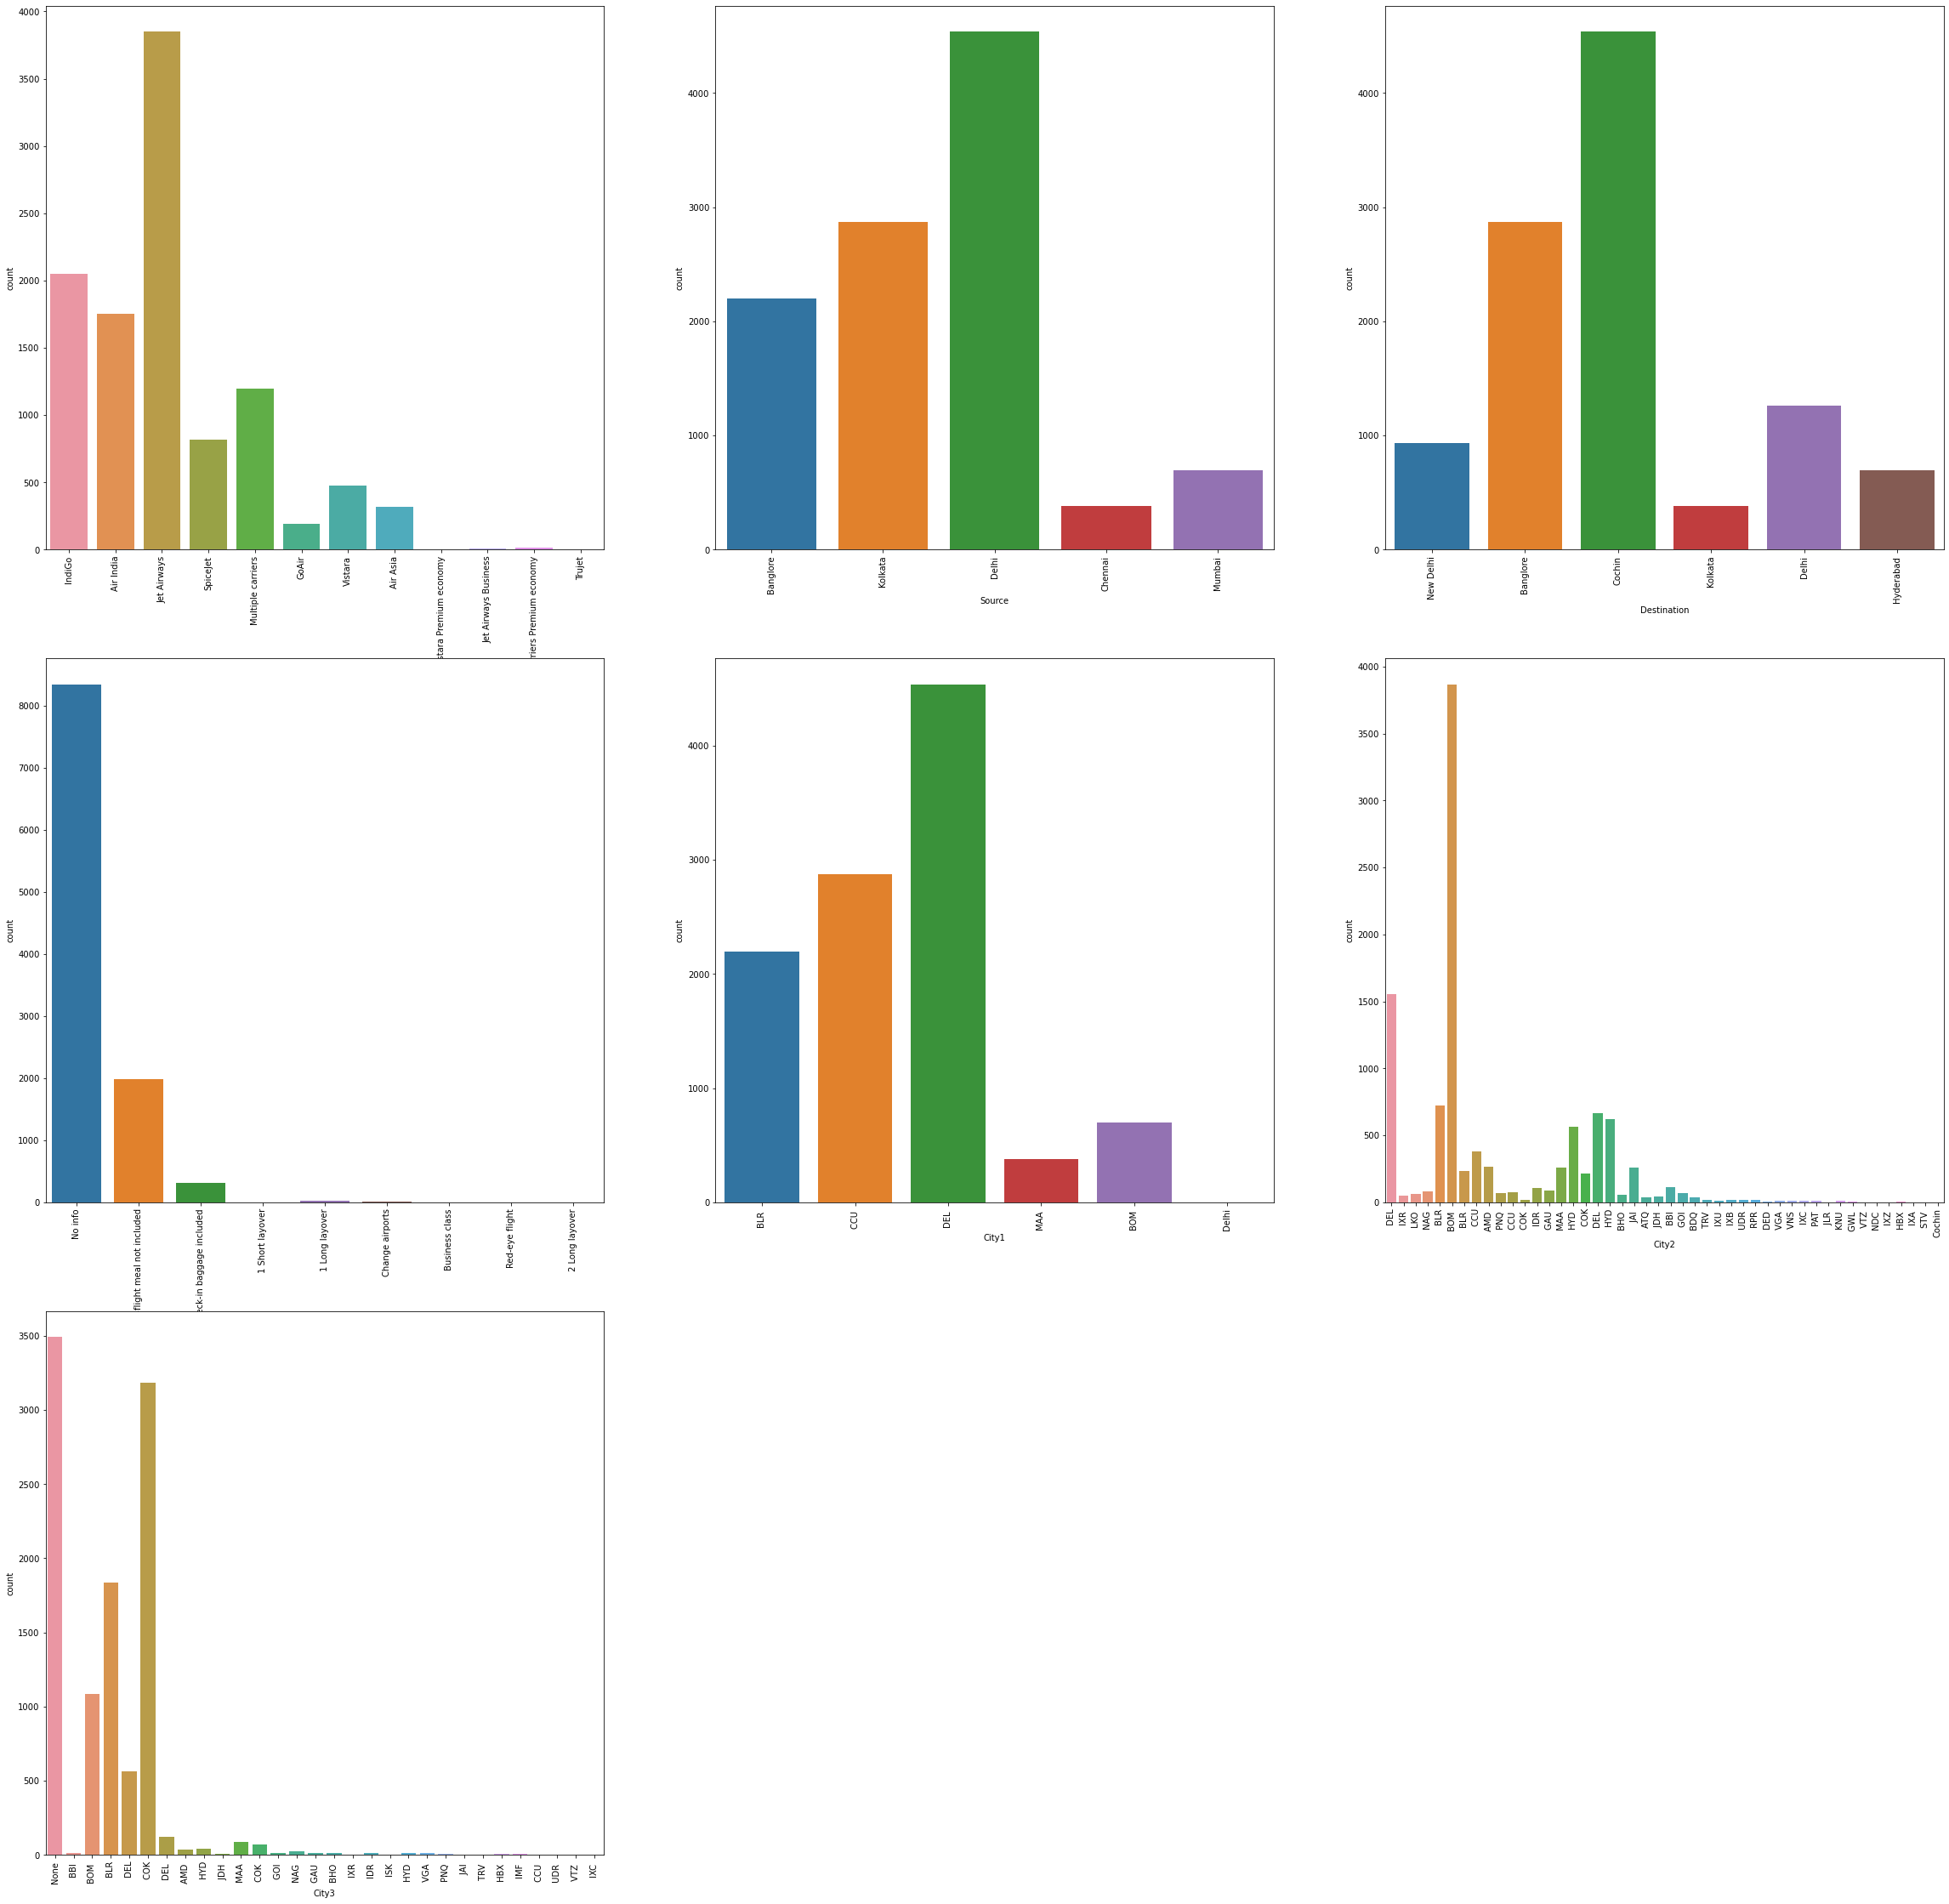

In [98]:
plt.figure(figsize = (40,40))
n = 1

for i in categorical:
    ax = plt.subplot(3,3,n)
    sns.countplot(df[i]) 
    plt.xticks(rotation=90)
    n+=1
plt.show()

We make the below mentioned observations using the plots above

__Airlines__<br>
1. Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.<br>
2. Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.<br>

__Source__<br>
Majority of the flights take off from Delhi<br>
Chennai has the minimum count of flight take-offs<br>

__Destination__<br>
Maximum flights land in Cochin<br>
Kolkata has the lowest count of receiving the flights<br>

__Additional Info__<br>
Maximum rows have No info as the value.<br>
We need to check how this column impacts the prices<br>

__City1__<br>
City1 has same data as source column<br>

__City2__<br>
Majority of the flights take a stop in Bombay.<br>
There are many cities with a very low count for stops. We will check how flights with 1stop impact prices of flights, and if any relation is there with stop place.<br>

__City3__<br>
Majority of the flights have no 2nd stop<br>
If there is a second stop, chances are high of the place being Cochin<br>

### Distribution of numerical data

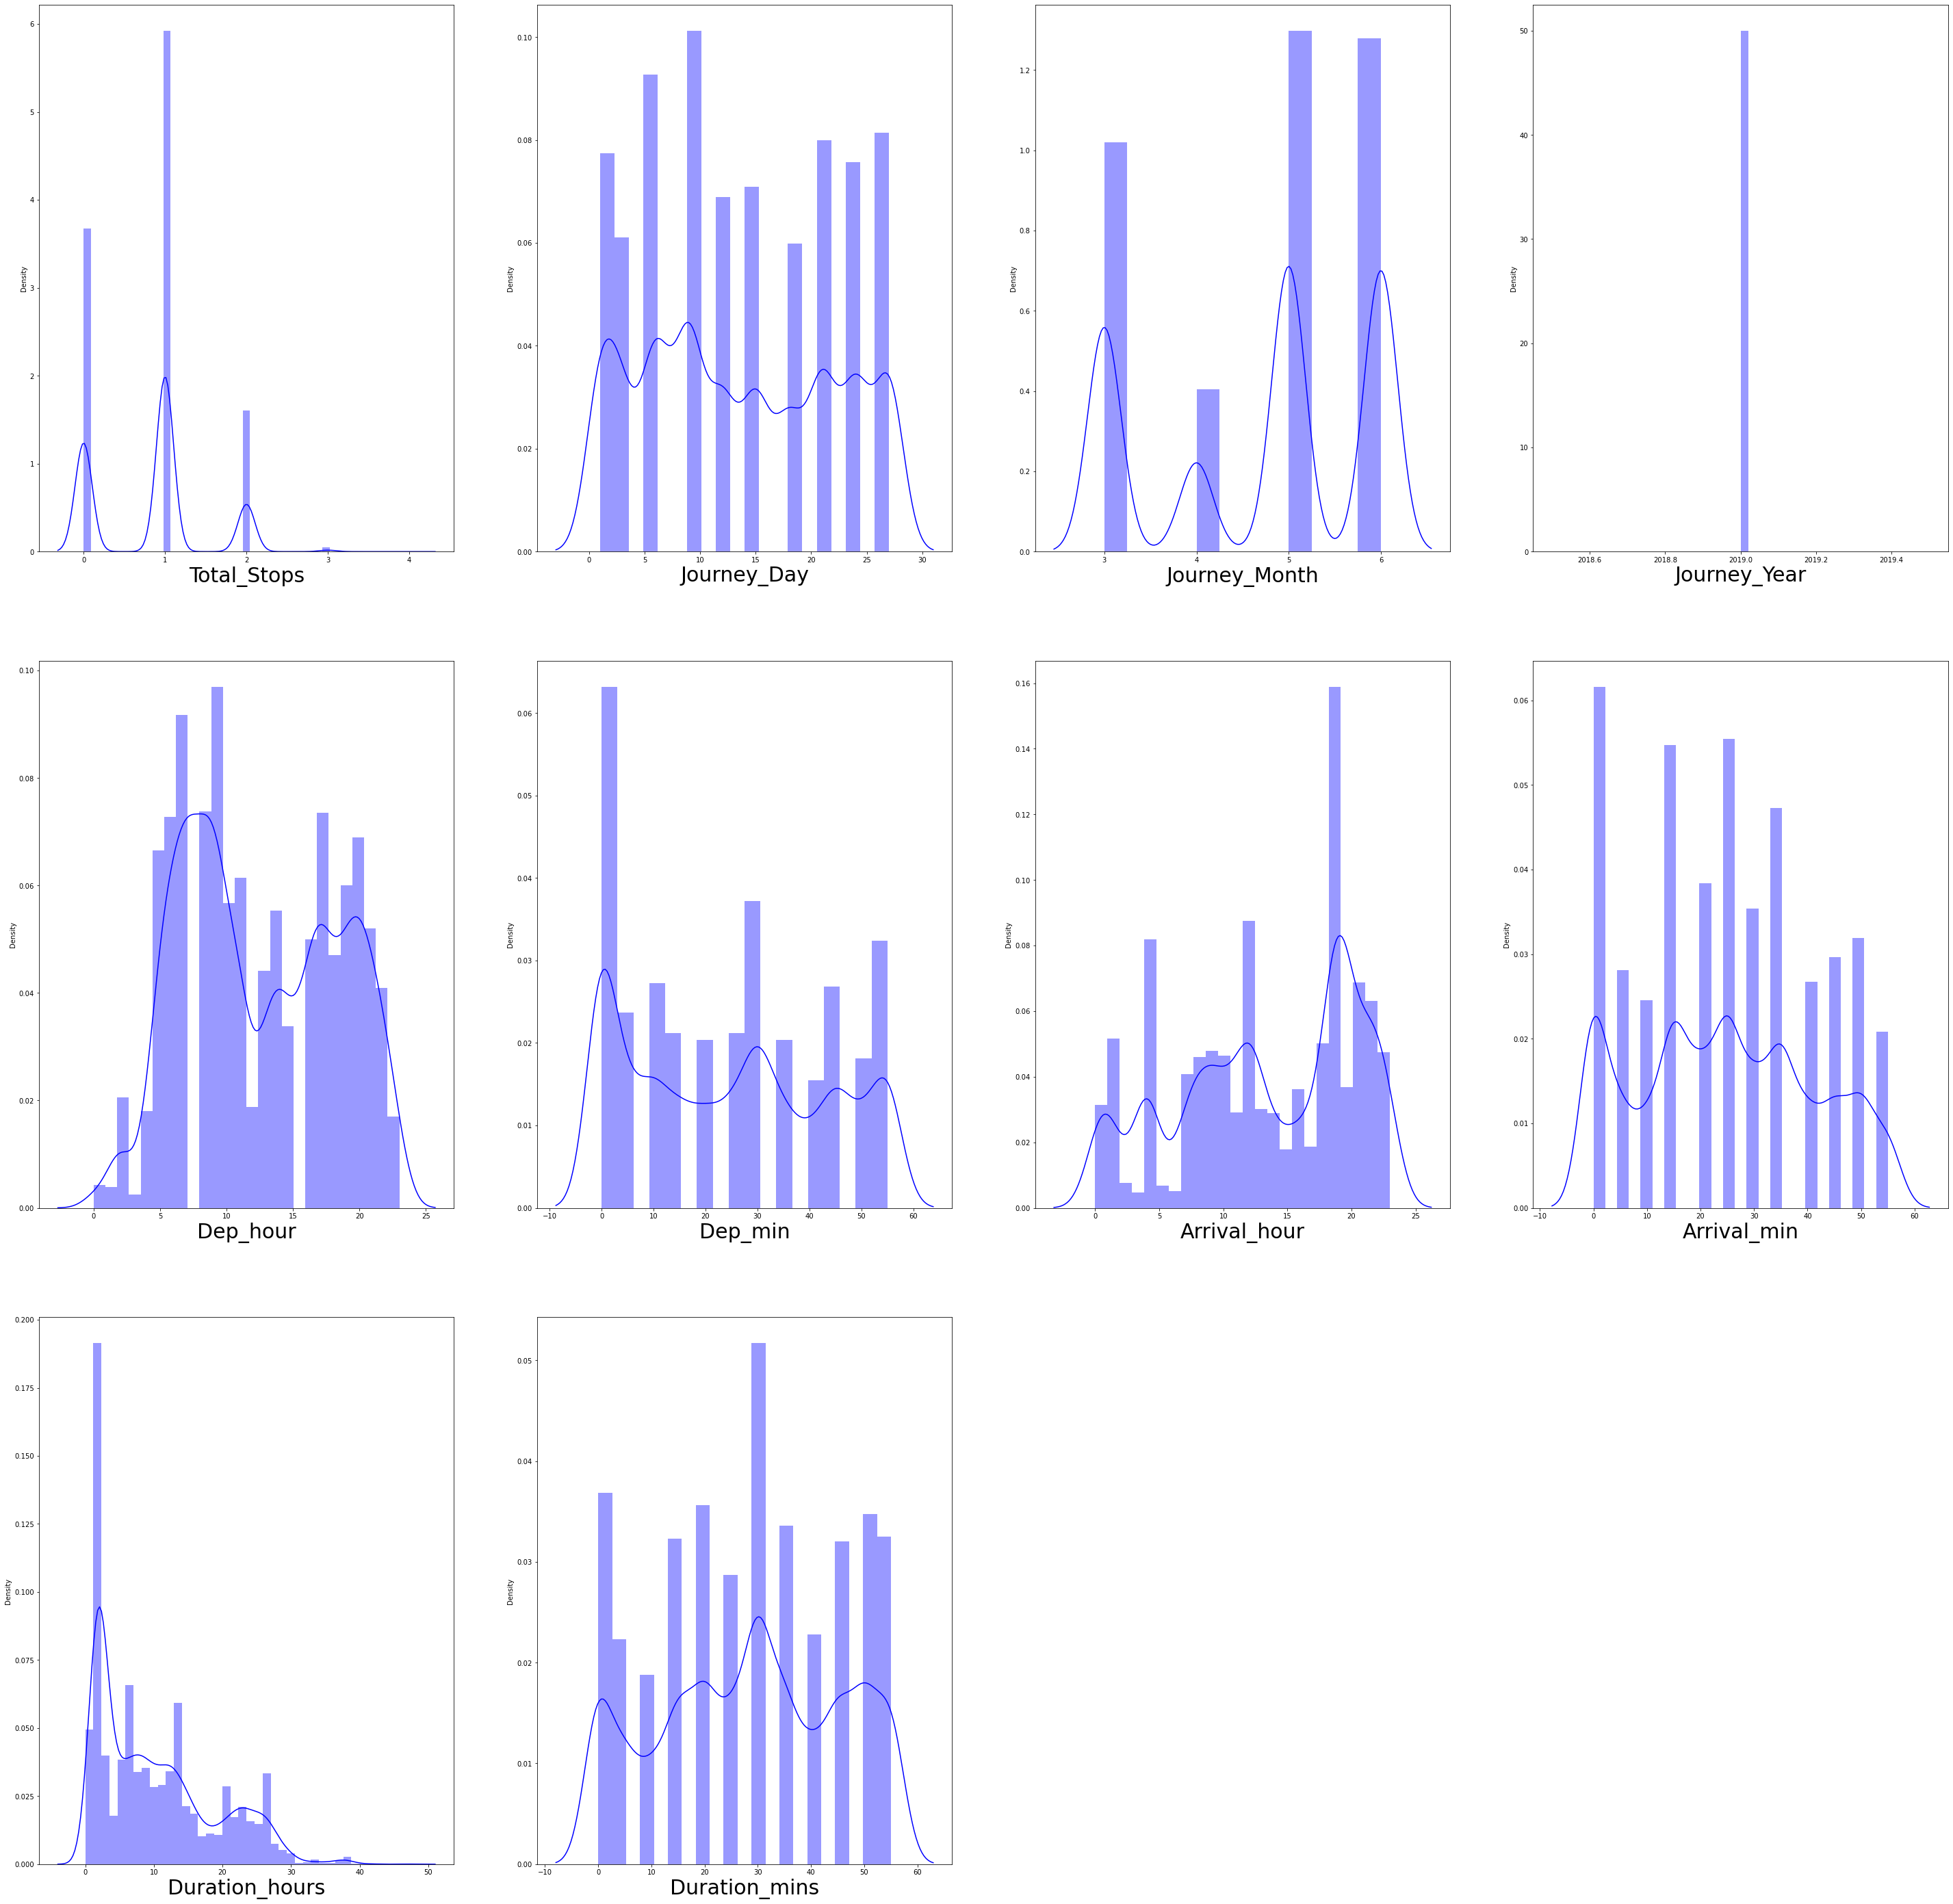

In [99]:
#Visualize the data distribution
plt.figure(figsize = (50,50))
n = 1

for i in numerical:
    if n <=10:
        ax = plt.subplot(3,4,n)
        sns.distplot(df[i], color = 'blue')
        plt.xlabel(i,fontsize=30)
        
    n+=1
plt.show()

We make the below observations from the numerical data<br>

__Total_Stops__<br>
- Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low<br>

__Journey_Day__<br>
- There are no specific dates when the flights travel; the distribution is almost similar for all dates

__Journey_Month__<br>
- People tend to travel less in April
- Flights in May and June have a higher count, seems like people travel during holiday months

__Journey_Year__<br>
- This column has only 2019 as a value and can be dropped

__Dep_hour__<br>
- Majority of the flights tend to fly in the early morning time
- Count of flights taking off during 16:00 - 23:00 is also high, Afternoon flights are less in number.

__Dep_min__<br>
- Most flights take off at whole hours (Mins as 00)

__Arrival_hour__<br>
- Majority of the flights reach its destination in the evening time around 18:00-19:00
- This seems to be because majority of the flights have take-off times in the morning and hence land after in the evening

__Arrival_min__<br>
- This distribution is similar and does not give out any dedicated information

__Duration_hours__<br>
- Majority of the flights have travel time for around 2-3 hours, which seems ok since these are domestic flights
- Some flights have time around 30 hours too, this could be because of the number of stops in between

__Duration_mins__<br>
- The data is divided and is not pointing towards any specific points

### Distibution of target

<AxesSubplot:xlabel='Price', ylabel='Density'>

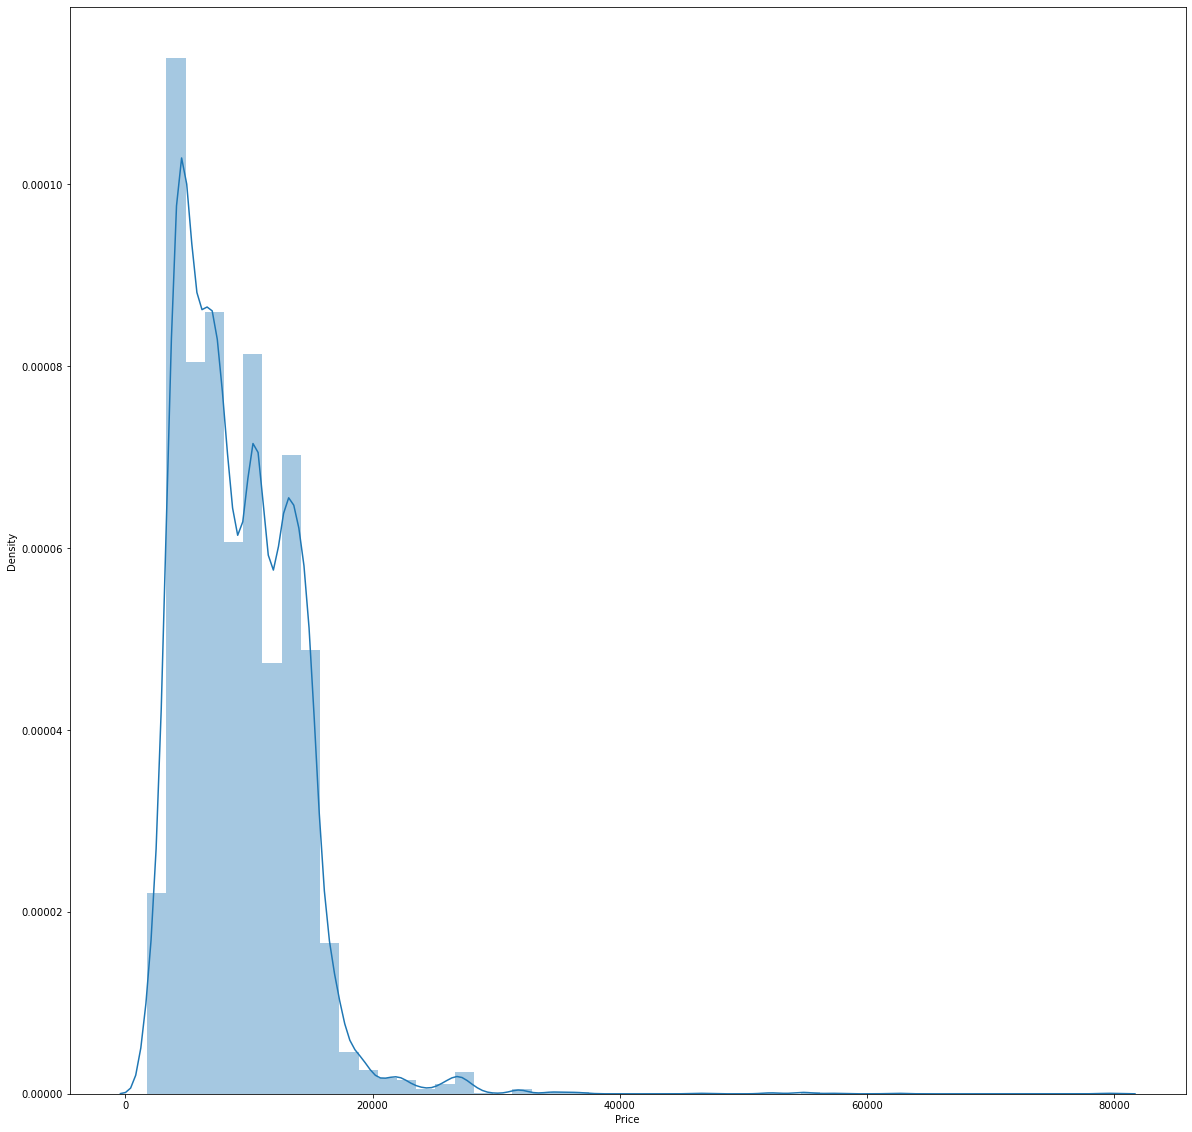

In [100]:
plt.figure(figsize = (20,20))
sns.distplot(df['Price'])

Number of flights having prices greater than 20k are quite less. Price range is skewed towards right

### Comparision of the independent features with ‘Price’ column, to check the impact on ‘Price’

1. Relationship of target with categorical features

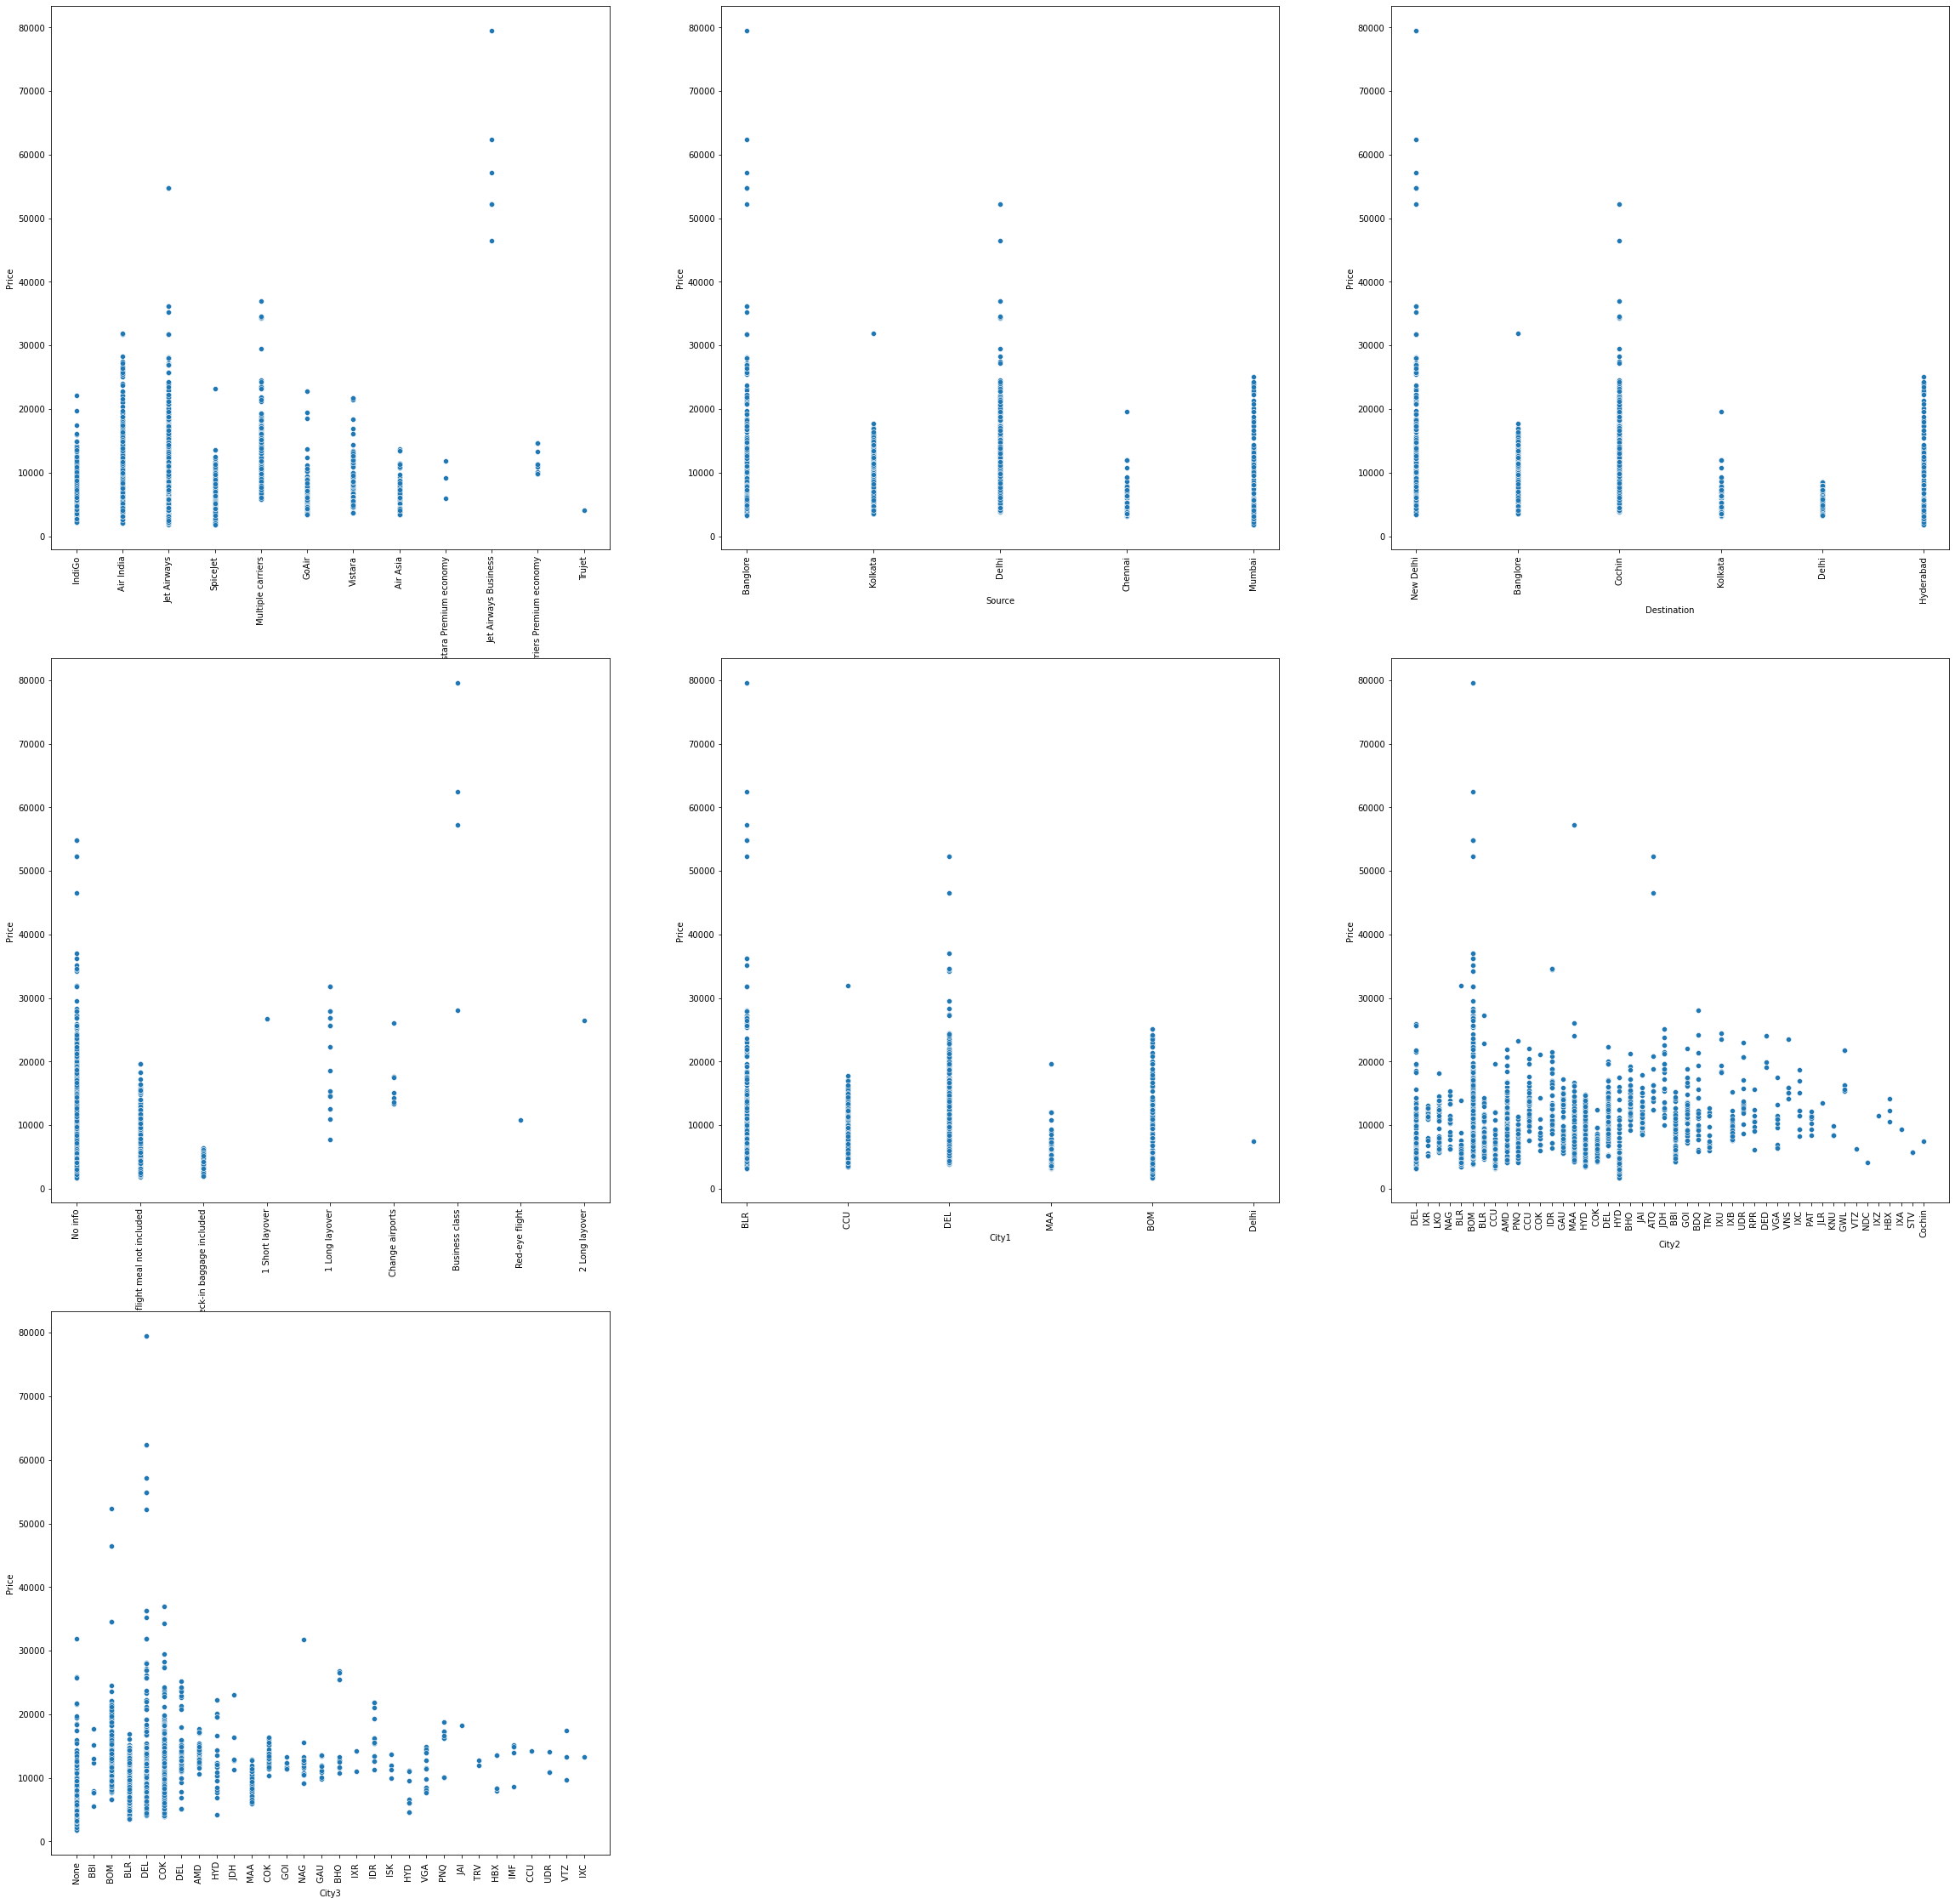

In [101]:
plt.figure(figsize = (40,40))
n = 1

for i in categorical:
    ax = plt.subplot(3,3,n)
    sns.scatterplot(x = df[i], y = df.Price) 
    plt.xticks(rotation=90)
    n+=1
plt.show()

We make the following observations<br>
- Jet airways business class has the highest prices between 50k — 80k
- All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k
- All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k
- If a flight is of business class, its price would be high
- The flights with high prices having 1 stop, have stop in Bombay
- Flights with 2 stops, having higher prices, have stop in Delhi.
We have quite less data where prices are higher than 50k. We check these rows once

In [102]:
df[df.Price>50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,BLR,BOM,DEL,1,3,2019,5,45,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1,No info,54826,BLR,BOM,DEL,18,3,2019,18,40,0,45,6,5
2618,Jet Airways,Banglore,New Delhi,1,No info,54826,BLR,BOM,DEL,18,3,2019,22,50,5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,BLR,BOM,DEL,1,3,2019,5,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,BLR,BOM,DEL,1,3,2019,5,45,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1,No info,54826,BLR,BOM,DEL,1,3,2019,16,55,23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,2,No info,52285,DEL,ATQ,BOM,6,3,2019,20,5,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,BLR,MAA,DEL,1,3,2019,9,45,14,25,4,40


We make the below observations<br>
- We observe that the flights with high prices are 8 in number.
- Majority of these flights fly from the same route — BLR->BOM->DEL
- Majority of the flights belong to Business class
- All the flights have Airlines as Jet airways.
- All of these flights took flight in March

Check if any flights duration is negative or 0

In [103]:
df[df.Duration_hours<=0]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,BOM,GOI,PNQ,6,3,2019,16,50,16,55,0,5


The data signifies that the flight time is ‘5m’, which is obviously wrong as the plane cannot fly from BOMBAY->GOA->PUNE->HYDERABAD in 5 mins! (The flight has ‘Total_stops’ as 2),We choose to drop this row due to incorrect data present in the row.

In [104]:
df.drop(6474,inplace=True)

2. Relationship of target with numerical features

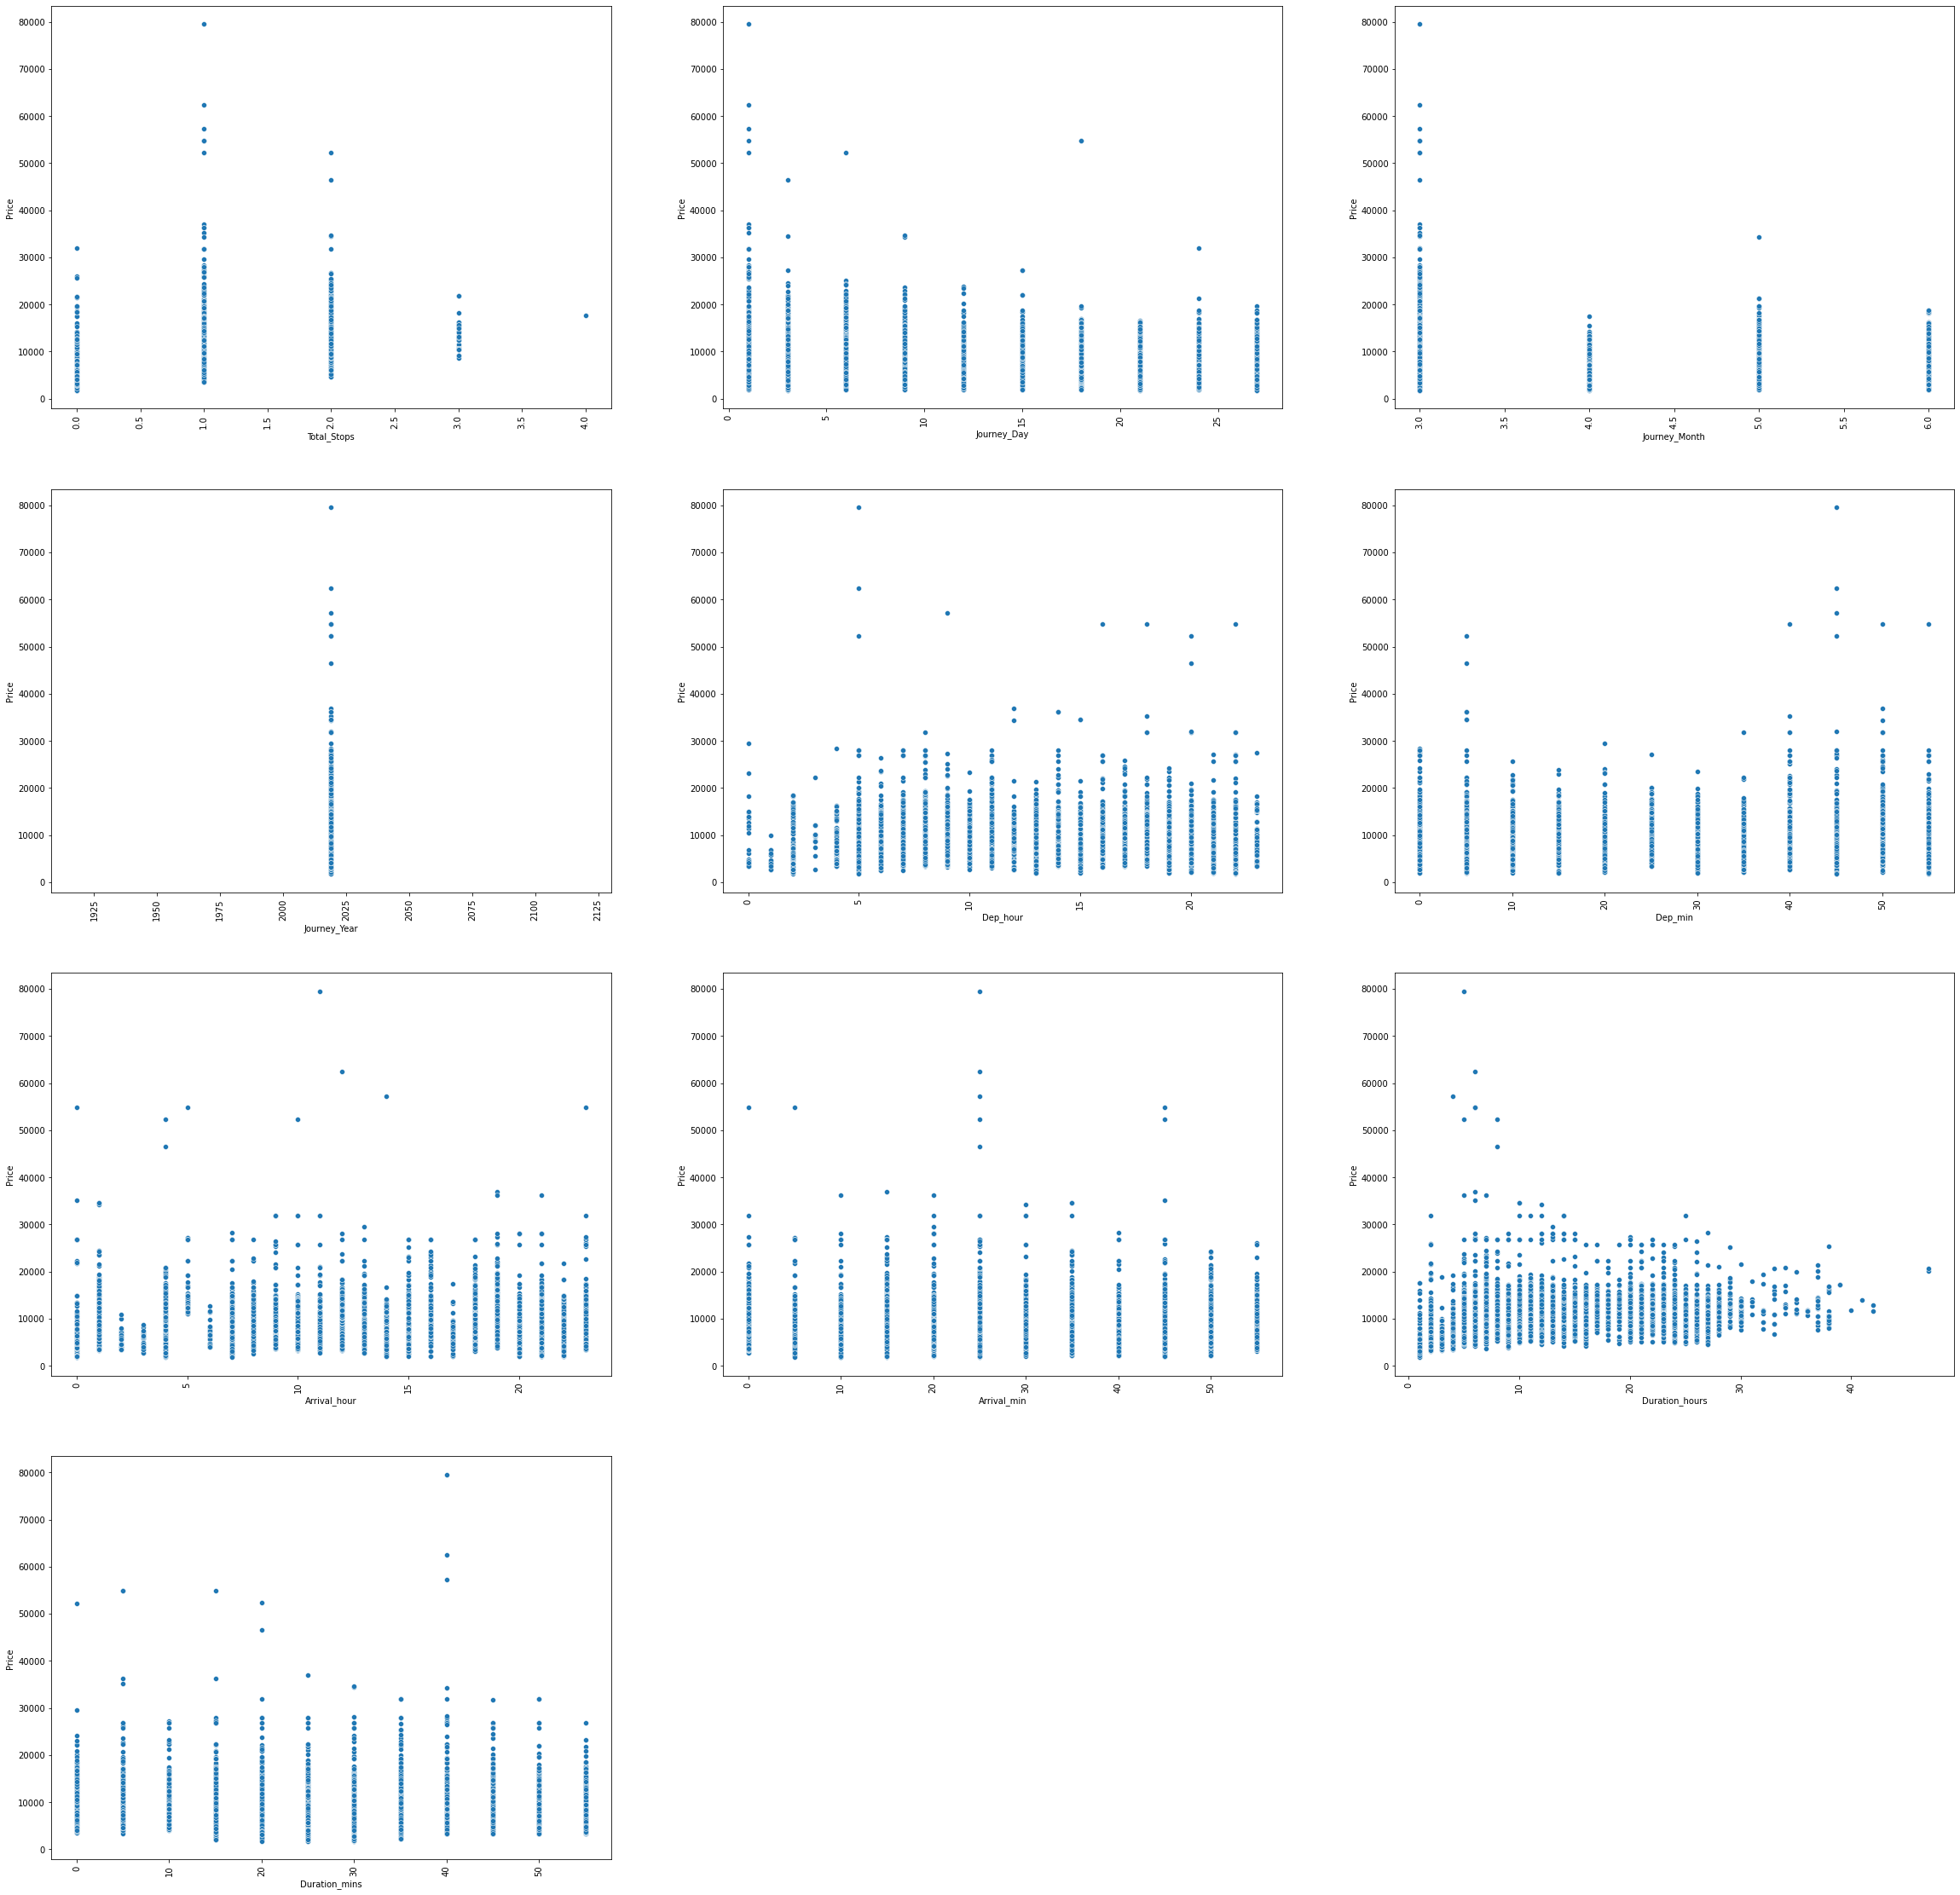

In [105]:
plt.figure(figsize = (40,40))
n = 1

for i in numerical:
    ax = plt.subplot(4,3,n)
    sns.scatterplot(x = df[i], y = df.Price) 
    plt.xticks(rotation=90)
    n+=1
plt.show()

We observe that<br>
- As number of stops increase, the price range gets decreasing into a smaller price window (10k — 22k)
- High price flights are lesser during end of month
- Prices are higher in the month of March
- With increase in travel hours, price increases, but the number of flights decrease

After the above analysis, we drop the non-required features, which we feel have no impact on prices of flights. These columns include ‘Dep_min’,’Arrival_min’,’Duration_mins’,’Journey_Year’, ‘City1’.

In [106]:
df.drop(['Journey_Year','Dep_min','Arrival_min','Duration_mins','City1'], axis=1,inplace=True)

In [107]:
numerical.remove('Journey_Year')
numerical.remove('Dep_min')
numerical.remove('Arrival_min')
numerical.remove('Duration_mins')
categorical.remove('City1')

### Outlier detection
We now plot boxplots to check the presence of outliers in our data

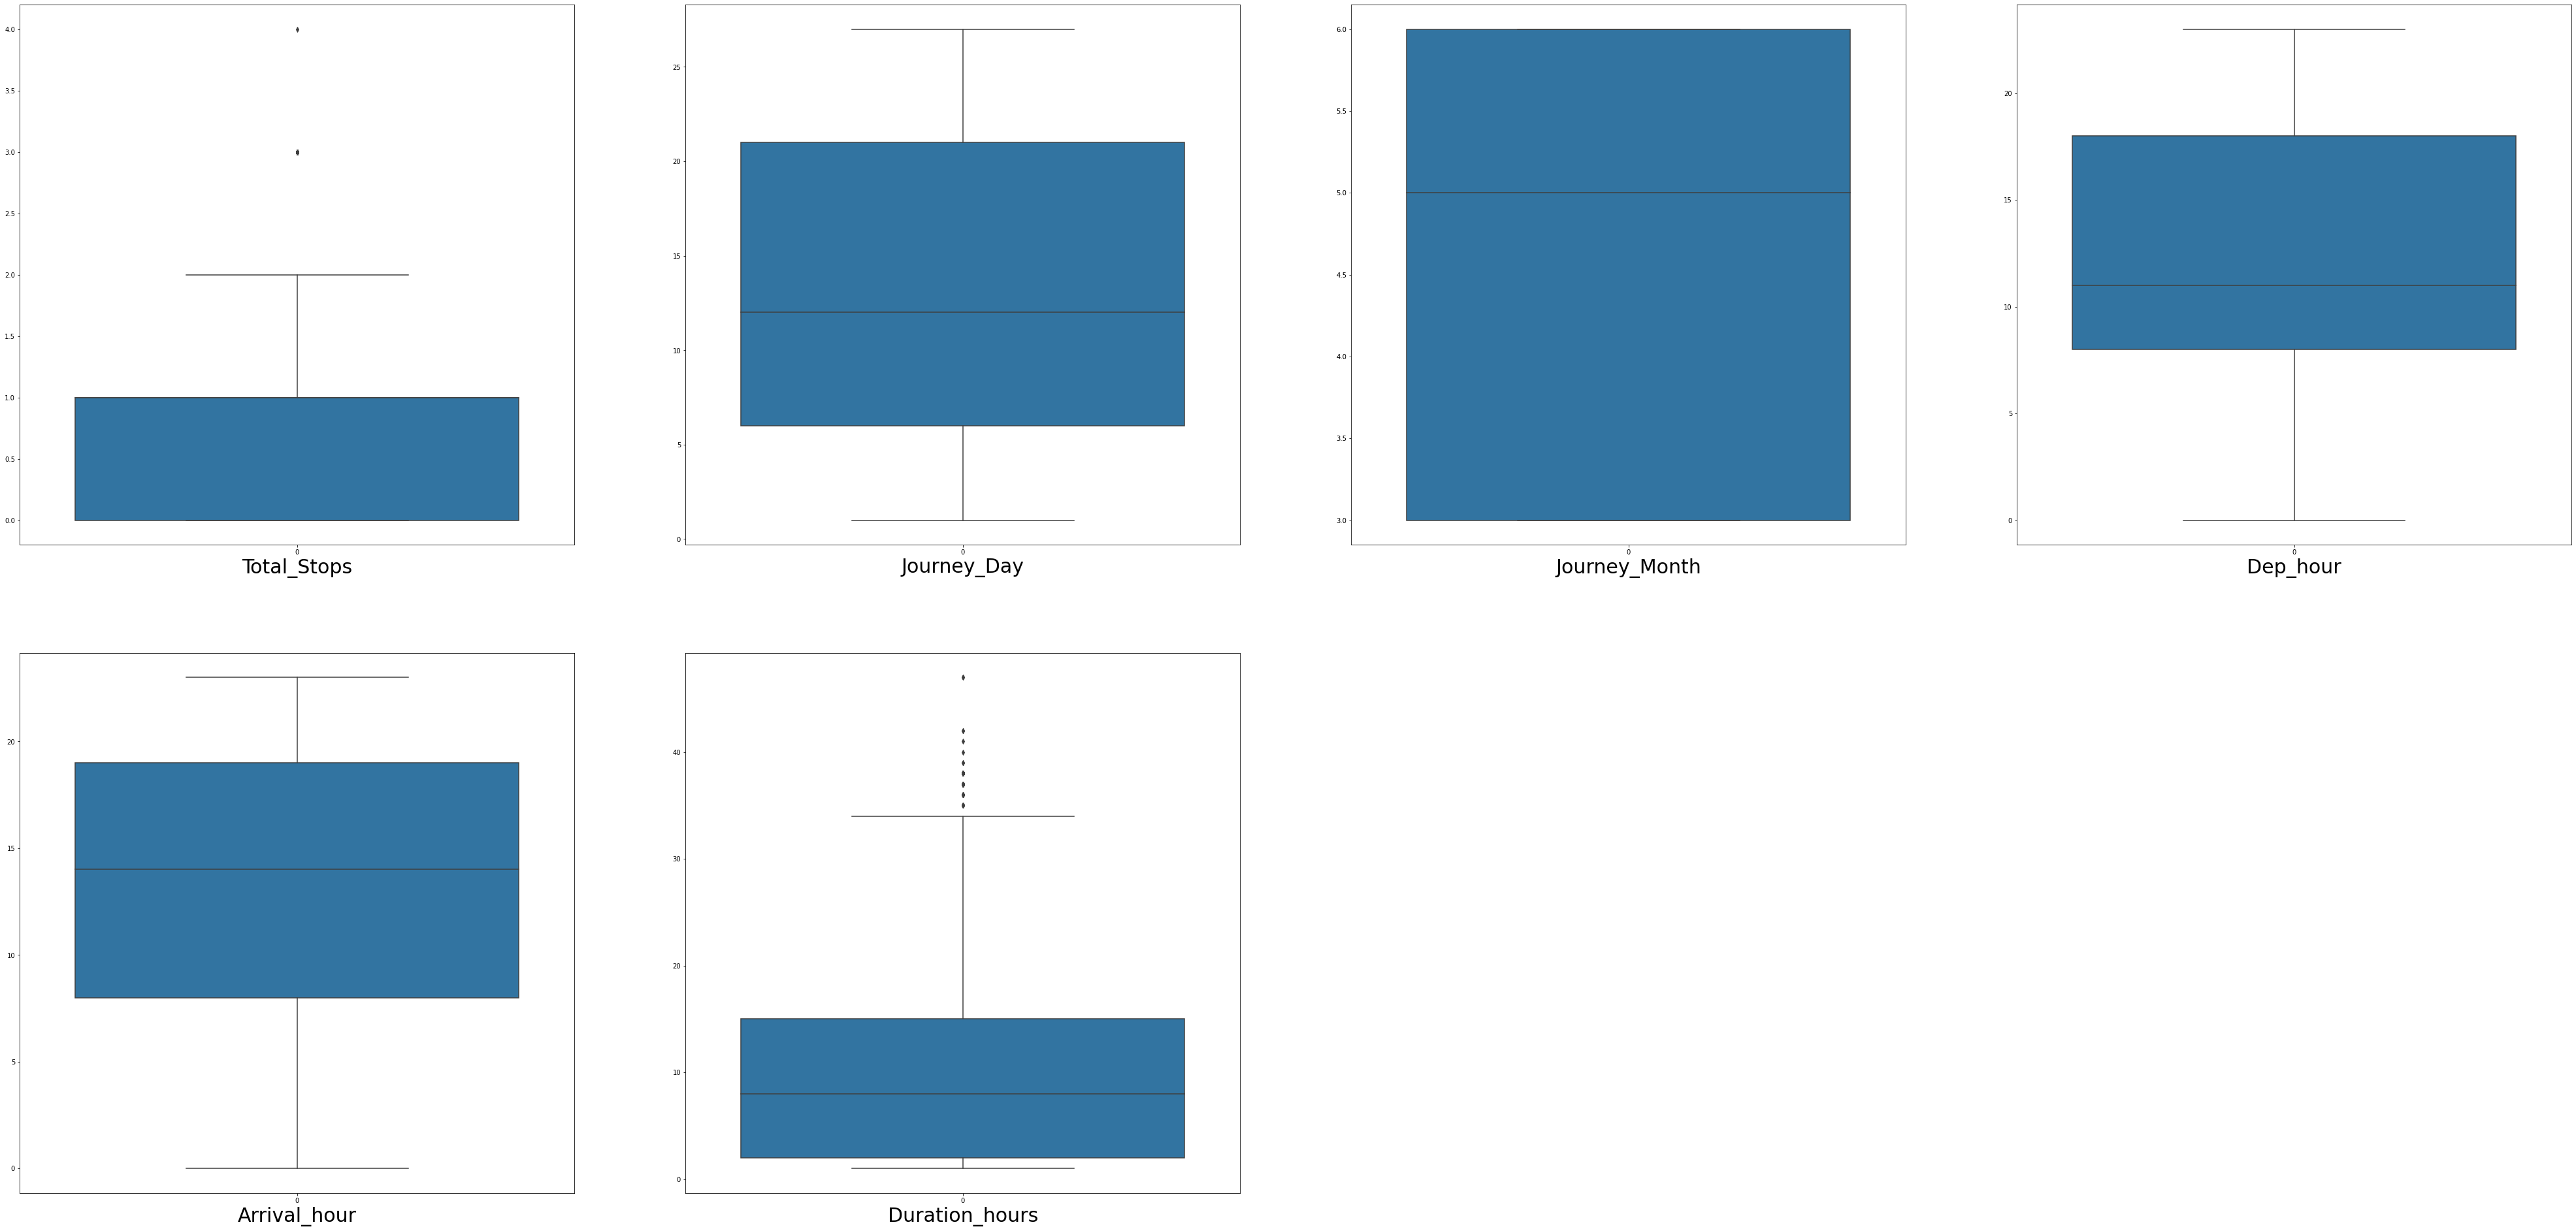

In [108]:
#Let's visualize the data using boxplot
plt.figure(figsize=(70,70))
n=1
for i in numerical:
    if n<=14:
        ax=plt.subplot(4,4,n)
        sns.boxplot(data=df[i],orient='v')
        plt.xlabel(i,fontsize=30)
    n+=1
plt.show()

We make the below conclusions<br>
- Outliers are present in Duration hours, Total stops and price
- We will not remove outliers from total stops since price is impacted by number of stops
- We will not remove the data with high number of hours, increase in number of hours shows a price pattern in the above graphs plotted for EDA

### Skewness identification

In [109]:
df.skew()

Total_Stops       0.317345
Price             1.813248
Journey_Day       0.118174
Journey_Month    -0.387708
Dep_hour          0.113224
Arrival_hour     -0.369876
Duration_hours    0.850822
dtype: float64

We need to treat skewness for ‘Duration_hours’ column, considering a threshold value for skewness as +/-0.5 (we will not transform ‘Price’ column, since it is our target variable)<br>

We use log transform method to remove skewness 

In [110]:
df.Duration_hours = np.log(df.Duration_hours)
df.Duration_hours.skew()

-0.26612233332369917

We have successfully treated skewness from our data

### Encoding the categorical data

We encode the categorical data in this step, to convert it to integer type, since the model does not work on ‘string’ data. We use ‘Label Encoder’ to achieve the desired results 

In [111]:
le = LabelEncoder()
for i in categorical:
    df[i] = le.fit_transform(df[i])

In [112]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City2,City3,Journey_Day,Journey_Month,Dep_hour,Arrival_hour,Duration_hours
0,3,0,5,0,7,3897,13,29,24,3,22,1,0.693147
1,1,3,0,2,7,7662,25,1,1,5,5,13,1.945910
2,4,2,1,2,7,13882,32,4,9,6,9,4,2.944439
3,3,3,0,1,7,6218,34,3,12,5,18,23,1.609438
4,3,0,5,1,7,13302,34,8,1,3,16,21,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,7,4107,5,29,9,4,19,22,0.693147
10679,1,3,0,0,7,4145,5,29,27,4,20,23,0.693147
10680,4,0,2,0,7,7229,13,29,27,4,8,11,1.098612
10681,10,0,5,0,7,12648,13,29,1,3,11,14,0.693147


Our transformed data looks like above

### Scaling the data
- The next step is to bring the data to a common scale, since there are certain columns with very small values and some columns with high values. This process is important as values on a similar scale allow the model to learn better
- We use standard scaler for this process –
- ‘StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance’

In [113]:
x = df.drop('Price',axis=1)
y = df.Price

In [114]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

Scaled data looks like below

In [116]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Airline,Source,Destination,Total_Stops,Additional_Info,City2,City3,Journey_Day,Journey_Month,Dep_hour,Arrival_hour,Duration_hours
0,-0.410805,-1.658435,2.416778,-1.220477,0.498649,0.137204,1.395015,1.237288,-1.467707,1.654268,-1.800319,-1.183304
1,-1.261152,0.890299,-0.973732,1.741835,0.498649,1.634890,-1.082280,-1.475307,0.250153,-1.303000,-0.050813,0.052178
2,0.014369,0.040721,-0.295630,1.741835,0.498649,2.508541,-0.816856,-0.531796,1.109082,-0.607172,-1.362943,1.036933
3,-0.410805,0.890299,-0.973732,0.260679,0.498649,2.758155,-0.905330,-0.177979,0.250153,0.958440,1.407109,-0.279653
4,-0.410805,-1.658435,2.416778,0.260679,0.498649,2.758155,-0.462956,-1.475307,-1.467707,0.610527,1.115525,-0.499718
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,-1.220477,0.498649,-0.861254,1.395015,-0.531796,-0.608777,1.132397,1.261317,-1.183304
10678,-1.261152,0.890299,-0.973732,-1.220477,0.498649,-0.861254,1.395015,1.591104,-0.608777,1.306354,1.407109,-1.183304
10679,0.014369,-1.658435,0.382472,-1.220477,0.498649,0.137204,1.395015,1.591104,-0.608777,-0.781129,-0.342397,-0.783432
10680,2.565411,-1.658435,2.416778,-1.220477,0.498649,0.137204,1.395015,-1.475307,-1.467707,-0.259258,0.094979,-1.183304


### Fitting the Regression models
We now proceed to the main step of our machine learning, fitting the model and predicting the outputs. We fit the data into multiple regression models to compare the performance of all models and select the best model

In [120]:
#Creating objects for data models
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svr = SVR()

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=40)

In [128]:
for i in [lr,dt,knn,svr]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(x_train))
    print(i)
    print("R2 score for test data:",test_score)
    print("R2 score for train data:",train_score)
    print('mse:',mean_squared_error(y_test,pred))
    print('mae:',mean_absolute_error(y_test,pred))
    print('rmse:',np.sqrt(mean_squared_error(y_test,pred)))
    print('-------------------------------------------')

LinearRegression()
R2 score for test data: 0.46363618988704114
R2 score for train data: 0.5071304244047801
mse: 12103724.325444238
mae: 2345.4666354646706
rmse: 3479.0407191414474
-------------------------------------------
DecisionTreeRegressor()
R2 score for test data: 0.7330070806093951
R2 score for train data: 0.9904242932286628
mse: 6025031.204974208
mae: 881.5452389866466
rmse: 2454.5938981783133
-------------------------------------------
KNeighborsRegressor()
R2 score for test data: 0.7531565369306907
R2 score for train data: 0.864389819247887
mse: 5570333.367383002
mae: 1154.8261325346314
rmse: 2360.155369331223
-------------------------------------------
SVR()
R2 score for test data: 0.05893752518804418
R2 score for train data: 0.06314337606463527
mse: 21236258.959651664
mae: 3374.7060623511334
rmse: 4608.281562540603
-------------------------------------------


We achieve the best score using K-Neighbors regressor, with an r2_score of 75%. We also obtain the minimum values for mean_absolute_error, mean_squared_error and root_mean_squared_error (regression metrics) with this model.

We try to use ensemble models to check if our performance improves using ensemble models

In [130]:
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
gb = GradientBoostingRegressor()

In [131]:
for i in [rf,ab,gb]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(x_train))
    print(i)
    print("R2 score for test data:",test_score)
    print("R2 score for train data:",train_score)
    print('mse:',mean_squared_error(y_test,pred))
    print('mae:',mean_absolute_error(y_test,pred))
    print('rmse:',np.sqrt(mean_squared_error(y_test,pred)))
    print('-------------------------------------------')

RandomForestRegressor()
R2 score for test data: 0.8411108126358797
R2 score for train data: 0.9743366205188578
mse: 3585534.456070317
mae: 770.0163227820268
rmse: 1893.5507534973328
-------------------------------------------
AdaBoostRegressor()
R2 score for test data: 0.21850218992862458
R2 score for train data: 0.303793419398389
mse: 17635481.506573357
mae: 3300.140049175587
rmse: 4199.4620496646185
-------------------------------------------
GradientBoostingRegressor()
R2 score for test data: 0.7913321740241206
R2 score for train data: 0.8557337140091696
mse: 4708852.07685789
mae: 1260.0828923468785
rmse: 2169.9889577732624
-------------------------------------------


RandomForestRegressor with 84% R2 score and GradientBoostingRegressor with 79% R2 score gives best results

### Cross Validation

We perform the cross validation of our model to check if the model has any overfitting issue, by checking the ability of the model to make predictions on new data, using k-folds. We test the cross validation for Random forest and Gradient Boosting Regressor

In [132]:
for i in range(2,9):
    print(cross_val_score(rf,x_scaled,y,cv=i).mean())

0.8456668057118453
0.8504188405871007
0.8643718701959333
0.8710932716927011
0.8717520687598964
0.8704518721818278
0.8692256553292672


In [133]:
for i in range(2,9):
    print(cross_val_score(gb,x_scaled,y,cv=i).mean())

0.8202257545044523
0.8252624969506429
0.8278004161769101
0.8272941630548498
0.8283099817352776
0.8229710586663783
0.8282554906614082


From the above results we can conclude that both the models not overfitting

### Hypertuning the model

GridSearch CV is a technique used to validate the model with different parameter combinations, by creating a grid of parameters and trying all the combinations to compare which combination gave the best results. We apply grid search on our model

In [139]:
params = {'n_estimators':[10, 20,30,40,50],'max_depth':[1,2,3],'max_samples':[50,100,200,400],'min_samples_split':[2,4,6]}
grid_search = GridSearchCV(rf,params,cv=3)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 3,
 'max_samples': 400,
 'min_samples_split': 4,
 'n_estimators': 40}

In [146]:
rfr=RandomForestRegressor(n_estimators=40,max_depth=3,max_samples=400,min_samples_split=2)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print("R2 score for test data:",r2_score(y_test,pred))
print("R2 score for train data:",r2_score(y_train,rfr.predict(x_train)))
print('mse:',mean_squared_error(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,pred)))

R2 score for test data: 0.5454172191694752
R2 score for train data: 0.5803298612441363
mse: 10258232.48795953
mae: 2081.2525493652047
rmse: 3202.8475592758905


In [140]:
params = {'alpha':[0.1,0.9,0.09],'max_depth':[3,4,5],'learning_rate':[0.1,0.01],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3],'n_estimators':[10,50,100]}
grid_search = GridSearchCV(gb,params,cv=3)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'alpha': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [144]:
gbr=GradientBoostingRegressor(alpha=0.1,max_depth=5,learning_rate=0.1,min_samples_split=2,min_samples_leaf=2,n_estimators=100)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("R2 score for test data:",r2_score(y_test,pred))
print("R2 score for train data:",r2_score(y_train,gbr.predict(x_train)))
print('mse:',mean_squared_error(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,pred)))

R2 score for test data: 0.8254458629665582
R2 score for train data: 0.9214320185622991
mse: 3939033.757839942
mae: 1008.3417851281088
rmse: 1984.6999163198304


The r2_score received for Gradient Boosting Regressor after hypertuning, which is 82% is improved, as compared to Random Forest Regressor giving accuracy as 54%, so the Random Forest Regressor without tuning is the best model

Hence we select Random Forest Regressor as our final model and save it

### Saving the final model

In [149]:
filename = 'flight_prediction_model.pickle'
pickle.dump(rf,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))

### Conclusion

We further proceed to test the data with loaded model

In [151]:
loaded_pred = loaded_model.predict(x_test)
loaded_pred

array([ 4564.06285259,  4536.57642229,  9671.45370953, ...,
        4780.19195718, 11979.20693516,  5801.63387496])

### Result :

In [156]:
data = pd.DataFrame({"Actual":y_test,"Predicted":loaded_pred})
data

,Actual,Predicted
635,4784,4564.062853
6404,2754,4536.576422
4129,6354,9671.453710
5281,6442,9079.174004
8537,9483,12262.821230
...,...,...
9880,7229,5799.734812
5666,4729,5734.829966
4885,4622,4780.191957
6133,14151,11979.206935


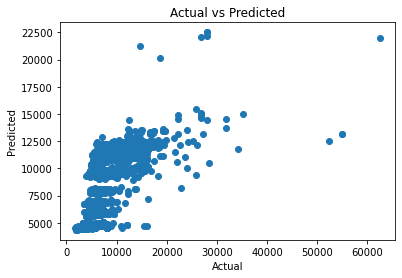

In [214]:
plt.scatter(y_test,loaded_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

These are the predictions on the training data, but we also had a test file for which we need to predict the outputs

In [185]:
#Load and display the training dataset using Pandas library
df_test = pd.read_excel(r"C:\Users\smith\OneDrive\Documents\Datascience\Evaluation-Projects\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set_with_Price.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [158]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
 10  Price            2671 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 229.7+ KB


There are no null values in test data.We shall continue and convert datatypes of features

In [159]:
#Creating list of categorical features
categorical = ['Airline','Source','Destination','Additional_Info']
for i in categorical:
    print(i, df_test[i].unique())

Airline ['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
Source ['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
Destination ['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Long layover' 'Business class' 'Change airports']


In [161]:
print(df_test['Total_Stops'].unique())

['1 stop' 'non-stop' '2 stops' '3 stops' '4 stops']


In [186]:
df_test.Route = df_test.Route.str.split('→')
df_test['City1'] = df_test.Route.str[0]
df_test['City2'] = df_test.Route.str[1]
df_test['City3'] = df_test.Route.str[2]
df_test['City4'] = df_test.Route.str[3]
df_test['City5'] = df_test.Route.str[4]
df_test['City6'] = df_test.Route.str[5]

In [187]:
df_test['Journey_Day'] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test['Journey_Month'] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test['Journey_Year'] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [188]:
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

In [189]:
df_test['Duration_hours']=df_test.Duration.apply(lambda x:get_duration(x)[0])
df_test['Duration_mins']=df_test.Duration.apply(lambda x:get_duration(x)[1])

In [190]:
df_test.Total_Stops.replace('non-stop',0,inplace=True)
df_test.Total_Stops = df_test.Total_Stops.str.split(' ')
df_test.Total_Stops = df_test.Total_Stops.str[0]

In [191]:
df_test.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Route','Duration'], axis=1, inplace=True)

In [192]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Total_Stops      1822 non-null   object
 4   Additional_Info  2671 non-null   object
 5   Price            2671 non-null   int64 
 6   City1            2671 non-null   object
 7   City2            2671 non-null   object
 8   City3            1822 non-null   object
 9   City4            391 non-null    object
 10  City5            12 non-null     object
 11  City6            1 non-null      object
 12  Journey_Day      2671 non-null   int64 
 13  Journey_Month    2671 non-null   int64 
 14  Journey_Year     2671 non-null   int64 
 15  Dep_hour         2671 non-null   int64 
 16  Dep_min          2671 non-null   int64 
 17  Arrival_hour     2671 non-null   

In [193]:
df_test.drop(['City4','City5','City6'],axis=1,inplace=True)

In [194]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,No info,15998,DEL,BOM,COK,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,No info,16612,CCU,MAA,BLR,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,25572,DEL,BOM,COK,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,No info,25778,DEL,BOM,COK,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,NaN,No info,16934,BLR,DEL,NaN,24,6,2019,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,No info,14046,CCU,DEL,BLR,6,6,2019,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,NaN,No info,14086,CCU,BLR,NaN,27,3,2019,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1,No info,22720,DEL,BOM,COK,6,3,2019,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1,No info,23544,DEL,BOM,COK,6,3,2019,4,0,19,15,15,15


In [195]:
df_test.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops        849
Additional_Info      0
Price                0
City1                0
City2                0
City3              849
Journey_Day          0
Journey_Month        0
Journey_Year         0
Dep_hour             0
Dep_min              0
Arrival_hour         0
Arrival_min          0
Duration_hours       0
Duration_mins        0
dtype: int64

In [196]:
df_test.Total_Stops.fillna('0',inplace=True)
df_test.City3.fillna('None',inplace=True)

In [197]:
df_test.Total_Stops = df_test.Total_Stops.astype('int64')

In [198]:
df_test.skew()

Total_Stops       0.321364
Price             1.269201
Journey_Day       0.199540
Journey_Month    -0.403700
Journey_Year      0.000000
Dep_hour          0.093759
Dep_min           0.128515
Arrival_hour     -0.443166
Arrival_min       0.115267
Duration_hours    0.884647
Duration_mins    -0.104482
dtype: float64

In [199]:
df_test[df_test.Duration_hours<=0]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Journey_Day,Journey_Month,Journey_Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
2660,Air India,Mumbai,Hyderabad,2,No info,17711,BOM,GOI,PNQ,12,3,2019,16,50,16,55,0,5


In [200]:
df_test.drop(2660,inplace=True)

In [201]:
df_test.Duration_hours = np.log(df_test.Duration_hours)
df_test.Duration_hours.skew()

-0.2976529378192759

In [202]:
df_test.drop(['Journey_Year','Dep_min','Arrival_min','Duration_mins','City1'], axis=1,inplace=True)

In [204]:
numerical.remove('Journey_Year')
numerical.remove('Dep_min')
numerical.remove('Arrival_min')
numerical.remove('Duration_mins')
categorical.remove('City1')

In [205]:
le = LabelEncoder()
for i in categorical:
    df_test[i] = le.fit_transform(df_test[i])

In [206]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City2,City3,Journey_Day,Journey_Month,Dep_hour,Arrival_hour,Duration_hours
0,4,2,1,1,5,15998,7,5,6,6,17,4,2.302585
1,3,3,0,1,5,16612,29,3,12,5,6,10,1.386294
2,4,2,1,1,3,25572,7,5,21,5,19,19,3.135494
3,6,2,1,1,5,25778,7,5,21,5,8,21,2.564949
4,0,0,2,0,5,16934,13,26,24,6,23,2,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,5,14046,14,3,6,6,20,20,3.135494
2667,3,3,0,0,5,14086,5,26,27,3,14,16,0.693147
2668,4,2,1,1,5,22720,7,5,6,3,21,4,1.791759
2669,1,2,1,1,5,23544,7,5,6,3,4,19,2.708050


In [209]:
x = df_test.drop('Price',axis=1)
y = df_test['Price']

In [210]:
x_scaled=sc.fit_transform(x)

In [211]:
loaded_pred_test = loaded_model.predict(x_scaled)

In [212]:
data = pd.DataFrame({"Actual":df_test['Price'],"Predicted":loaded_pred_test})
data

,Actual,Predicted
0,15998,11932.187675
1,16612,6112.431142
2,25572,11250.954086
3,25778,11688.750797
4,16934,4677.807899
...,...,...
2666,14046,9590.170826
2667,14086,4780.191957
2668,22720,12192.310110
2669,23544,10042.034043


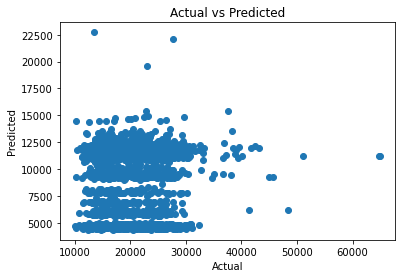

In [213]:
plt.scatter(df_test['Price'],loaded_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()